4. Performing Label Encoding

Performing Label Encoding
We will convert categorical text data into numeric labels using Label Encoding because ML models work with numbers.

LabelEncoder() converts text labels into integers.
fit_transform() learns encoding and applies it.
copy() : creates a duplicate of the DataFrame to avoid changing the original data

Convert last_5 to form_score

In [2]:
import pandas as pd

In [11]:
df=pd.read_excel('data/cleaned/sofascore/players_teams_cleaned.xlsx')


In [15]:
def form_score(form_str):
    score_map = {'W': 1, 'D': -1, 'L': 0}
    return sum(score_map.get(result.upper(), 0) for result in form_str.split('_'))

df['form_score'] = df['last_5'].apply(form_score)


In [16]:
# Win rate: W count divided by number of matches
def win_rate(form_str):
    results = form_str.split('_')
    return results.count('W') / len(results) if results else 0

df['win_rate'] = df['last_5'].apply(win_rate)


In [17]:
df.to_excel('preprocessed_data.xlsx', index=False)

In [59]:
df_preprocessed=pd.read_excel('preprocessed_data.xlsx')

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
columns_to_encode = ['league', 'team', 'name']  # or 'player_name' if that's your column

for col in columns_to_encode:
    le = LabelEncoder()
    df_preprocessed[col + '_encoded'] = le.fit_transform(df_preprocessed[col])
    label_encoders[col] = le


In [50]:
# One-hot encode categorical features
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['position', 'age_group'], drop_first=True)
# Convert all True/False to 1/0
df_preprocessed = df_preprocessed.replace({True: 1, False: 0})
# or, better for bool dtype columns:
df_preprocessed = df_preprocessed.astype({col: int for col in df_preprocessed.select_dtypes(include='bool').columns})


C:\Users\bahri\AppData\Local\Temp\ipykernel_23864\3830443190.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_preprocessed = df_preprocessed.replace({True: 1, False: 0})


5. Performing Feature Selection


We drop picture and id columns because they don’t provide meaningful information for correlation analysis. By removing these irrelevant columns we focus on features that can reveal relationships useful for modeling or insights. Computing and visualizing correlations helps identify which features are related and can guide feature selection.

In [65]:
df=pd.read_excel('encoded_data.xlsx')

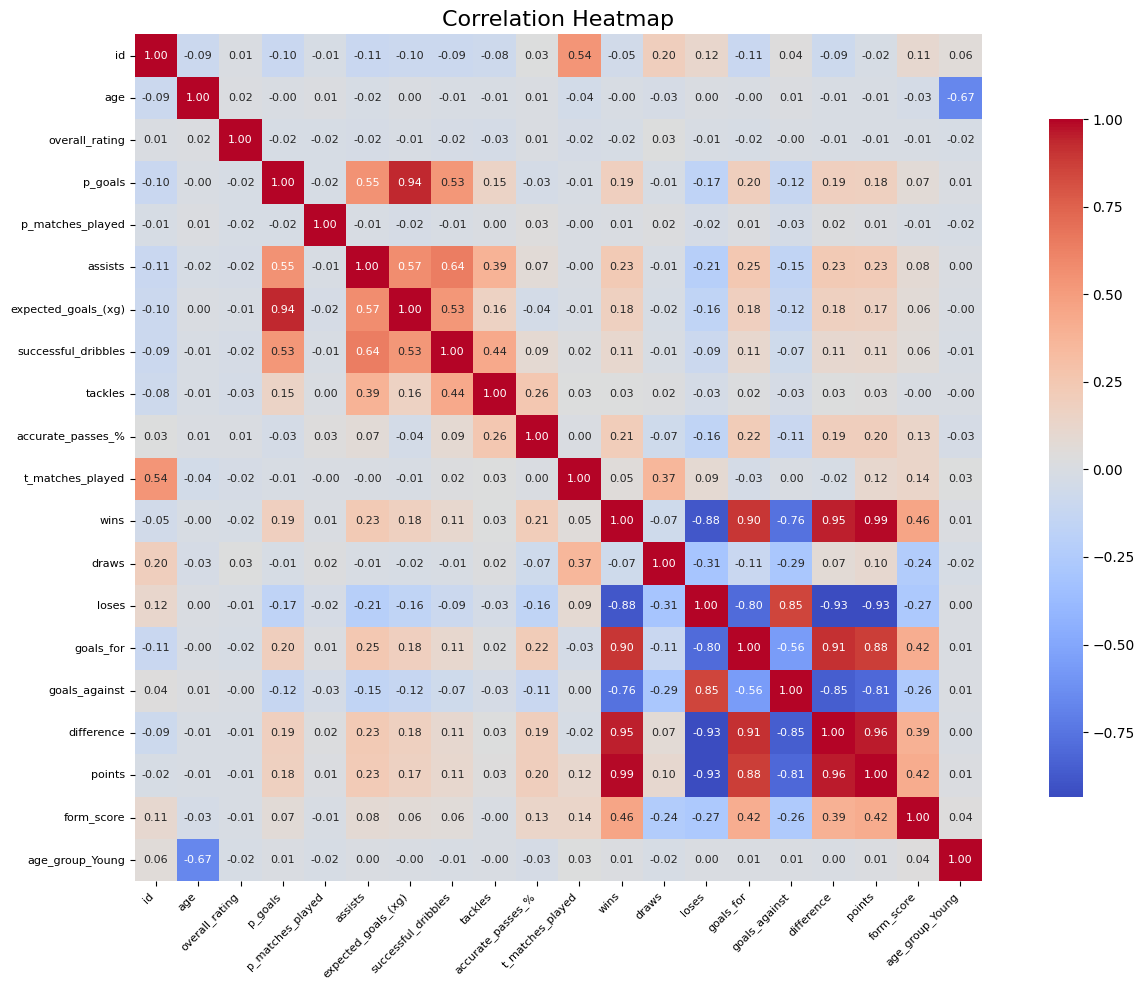

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

# Compute correlation matrix, dropping non-numeric columns
corr_matrix = df_preprocessed.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 10))  # Larger figure size
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Based on the heatmap we will drop the columns ID, picture, points, difference and form_score because they show high correlation with other features. Dropping highly correlated columns helps reduce redundancy and prevents multicollinearity which can improve model performance and interpretability.